In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Try reading the CSV file with different encodings
encodings_to_try = ['latin1', 'ISO-8859-1', 'utf-16']
for encoding in encodings_to_try:
    try:
        df = pd.read_csv('spam.csv', encoding=encoding)
        print(f"CSV file successfully read with encoding '{encoding}'.")
        break  # Stop trying encodings if successful
    except UnicodeDecodeError:
        print(f"Failed to read CSV file with encoding '{encoding}'. Trying the next encoding...")


CSV file successfully read with encoding 'latin1'.


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [14]:
df.rename({'v1':'label','v2':'message'},axis=1,inplace=True)
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [15]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
print(df.isnull().any())
print('-'*60)
print(df.duplicated().any())

label      False
message    False
dtype: bool
------------------------------------------------------------
False


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   object
 1   message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [22]:
print(f'shape of the df: {df.shape[0]} rows and {df.shape[1]} columns ')

shape of the df: 5169 rows and 2 columns 


In [24]:
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


<Axes: ylabel='label'>

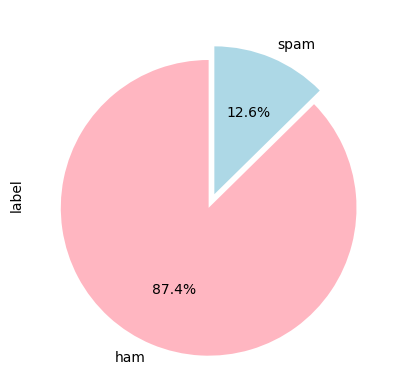

In [49]:
df['label'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',explode=(0.1,0),colors=['lightpink','lightblue'])

In [78]:
import nltk
import spacy
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [75]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\satis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\satis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
def cleaning(text):
    # Convert to lower case
    text = text.lower()
    # Removing punctuations
    text = ''.join([t for t in text if t not in string.punctuation])
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([t for t in text.split() if t not in stop_words])
    # Stemming
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(t) for t in text.split()])
    return text


In [81]:
# Example usage:
text = "This is a sample text, with punctuations and stopwords, that needs cleaning."
cleaned_text = cleaning(text)
print(cleaned_text)


sampl text punctuat stopword need clean


In [82]:
df['message'].apply(cleaning)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                              ì b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer=cleaning)
tdidf_matrix = tfidf.fit_transform(df['message'])

In [90]:
mess = df.iloc[3]['message']
print(mess)
print(tfidf.transform([mess]))


U dun say so early hor... U c already then say...
  (0, 35)	0.2754181088412825
  (0, 31)	0.3234762360229158
  (0, 29)	0.19522497952970697
  (0, 28)	0.2738136943270728
  (0, 25)	0.08536492278653923
  (0, 24)	0.09014056861243729
  (0, 22)	0.18720904556204176
  (0, 19)	0.17451766947788283
  (0, 18)	0.10214332310637972
  (0, 15)	0.16191612394160035
  (0, 14)	0.20983769520972023
  (0, 13)	0.10771234873598431
  (0, 11)	0.4167786371164955
  (0, 0)	0.5995971914207383


In [102]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [95]:
model = Pipeline(steps=[('vectorizer',TfidfVectorizer(analyzer=cleaning)),('classifier',MultinomialNB())])

In [96]:
x = df['message']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [97]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function cleaning at 0x00000181151ED9E0>)),
                ('classifier', MultinomialNB())])

In [99]:
y_pred = model.predict(x_test)

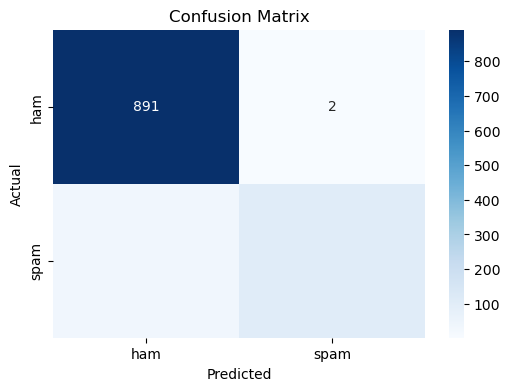


Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       893
        spam       0.98      0.75      0.85       141

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.92      1034
weighted avg       0.96      0.96      0.96      1034



In [144]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['ham', 'spam']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


In [133]:
#x_test[y_test != y_pred]

In [108]:
def detect_spam(s):
    return model.predict([s])[0]
detect_spam('Win 500 pounds by scanning the QR code sent to you.')

'spam'

In [113]:
from sklearn.svm import SVC
model = Pipeline(steps=[('vectorizer',TfidfVectorizer(analyzer=cleaning)),('classifier',SVC())])
model.fit(x_train,y_train)
y_hat = model.predict(x_test)

In [131]:
print('-'*30,'SVC','-'*30)
print(classification_report(y_test,y_hat))
print(confusion_matrix(y_test,y_hat))
print('-'*30,'NB','-'*30)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

------------------------------ SVC ------------------------------
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       893
        spam       0.97      0.83      0.90       141

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

[[890   3]
 [ 24 117]]
------------------------------ NB ------------------------------
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       893
        spam       0.98      0.75      0.85       141

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.92      1034
weighted avg       0.96      0.96      0.96      1034



array([[891,   2],
       [ 35, 106]], dtype=int64)

In [124]:
count = 0

for i in range(len(y_test)):
    if y_test.iloc[i] != y_pred[i]:
        count+=1

print('Total number of test cases', len(y_test))
print('Number of wrong of predictions NB', count)
print('---'*30)
count = 0

for i in range(len(y_test)):
    if y_test.iloc[i] != y_hat[i]:
        count+=1

print('Total number of test cases', len(y_test))
print('Number of wrong of predictions SVC', count)

Total number of test cases 1034
Number of wrong of predictions NB 37
------------------------------------------------------------------------------------------
Total number of test cases 1034
Number of wrong of predictions SVC 27


In [132]:
def cleaning_lem(text):
    # Convert to lower case
    text = text.lower()
    # Removing punctuations
    text = ''.join([t for t in text if t not in string.punctuation])
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([t for t in text.split() if t not in stop_words])
   # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(t) for t in text.split()])
    return text


In [134]:
# Example usage:
text = "I am reading books and running"
cleaned_text = cleaning(text)
print(cleaned_text)

read book run


In [135]:
df['message'].apply(cleaning_lem)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                nah dont think go usf life around though
                              ...                        
5567    2nd time tried 2 contact u u å£750 pound prize...
5568                          ì b going esplanade fr home
5569                           pity mood soany suggestion
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object

In [136]:
lem_tfidf = TfidfVectorizer(analyzer=cleaning_lem)
lem_tdidf_matrix = tfidf.fit_transform(df['message'])

In [137]:
lem_model = Pipeline(steps=[('vectorizer',TfidfVectorizer(analyzer=cleaning_lem)),('classifier',MultinomialNB())])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)
lem_model.fit(x_train,y_train)
y_pred_lem = model.predict(x_test)

In [139]:
from sklearn.svm import SVC
model_lem = Pipeline(steps=[('vectorizer',TfidfVectorizer(analyzer=cleaning_lem)),('classifier',SVC())])
model_lem.fit(x_train,y_train)
y_hat_lem = model.predict(x_test)

In [140]:
print('-'*30,'SVC','-'*30)
print(classification_report(y_test,y_hat_lem))
print(confusion_matrix(y_test,y_hat))
print('-'*30,'NB','-'*30)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred_lem)

------------------------------ SVC ------------------------------
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       893
        spam       0.97      0.83      0.90       141

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

[[890   3]
 [ 24 117]]
------------------------------ NB ------------------------------
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       893
        spam       0.98      0.75      0.85       141

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.92      1034
weighted avg       0.96      0.96      0.96      1034



array([[890,   3],
       [ 24, 117]], dtype=int64)

In [141]:
count = 0

for i in range(len(y_test)):
    if y_test.iloc[i] != y_pred_lem[i]:
        count+=1

print('Total number of test cases', len(y_test))
print('Number of wrong of predictions NB', count)
print('---'*30)
count = 0

for i in range(len(y_test)):
    if y_test.iloc[i] != y_hat_lem[i]:
        count+=1

print('Total number of test cases', len(y_test))
print('Number of wrong of predictions SVC', count)

Total number of test cases 1034
Number of wrong of predictions NB 27
------------------------------------------------------------------------------------------
Total number of test cases 1034
Number of wrong of predictions SVC 27


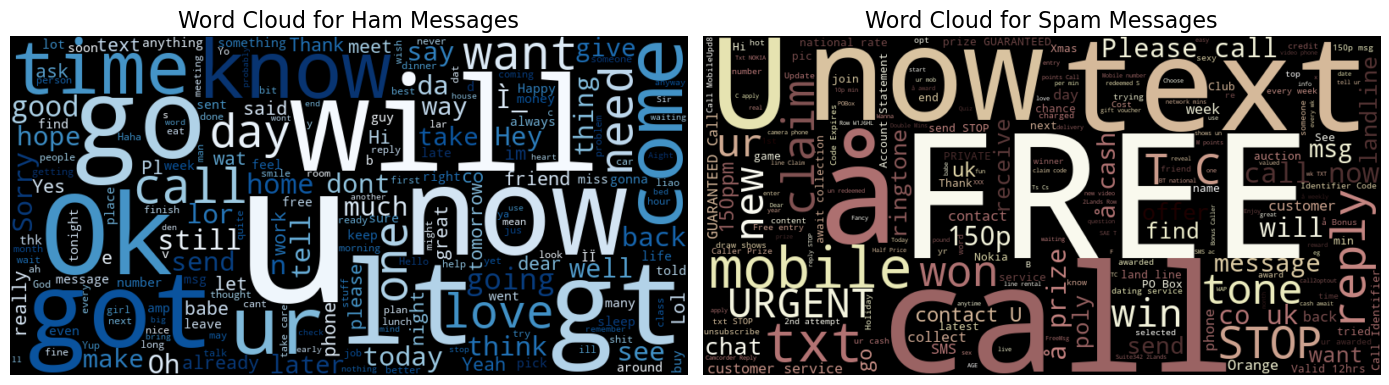

In [142]:
ham_words = ' '.join(df[df['label'] == 'ham']['message'])
spam_words = ' '.join(df[df['label'] == 'spam']['message'])


wordcloud_ham = WordCloud(width=800, height=400, colormap='Blues').generate(ham_words)
wordcloud_spam = WordCloud(width=800, height=400, colormap='pink').generate(spam_words)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()